Objectif
========

*Le rappeur 20cent apprécie beaucoup l'hélicoptère pour se déplacer
entre deux performances, afin de limiter les temps de trajets. De plus,
contempler l'humanité depuis le ciel inspire à 20cent ses plus belles
compositions. Le seul problème est le bruit dans l'habitacle, qui peut
perturber les oreilles sensibles du musicien. Heureusement, un ami
ingénieur lui propose une solution pour pallier ce problème, inspirée
des casques antibruit actifs. Après avoir modélisé la transmission du
bruit du moteur dans l'habitacle, la seconde étape est d'utiliser ces
informations pour concevoir un filtre adapté.*

Afin de pouvoir espérer composer dans de bonnes conditions pendant les
vols, 20cent a à sa disposition 2 micros disposés stratégiquement à 2
endroits différents de l'habitacle. Le premier enregistre sa composition
avec le bruit du moteur tandis que le second enregistre le bruit du
moteur uniquement.

Le schéma ci-dessous représente la transmission du bruit dans
l'habitacle. La fonction de transfert `H1` modélise le canal allant du bruit du moteur (`x`) vers le deuxième
micro, insensible à `y`. Le signal `y` est celui émis par 20cent.  La fonction de transfert `H2` modélise le canal allant du
bruit du moteur (`x`) vers le micro dans lequel s’enregistre 20cent. 

Un ami ingénieur a modélisé la transmission du bruit dans l'habitacle
vers les deux micros via les deux fonctions de transfert `H1` et `H2`.
Comment doit-il concevoir la fonction de transfert `H3` pour qu'elle
agisse comme un filtre permettant de retrouver le signal original,
c'est-à-dire obtenir `y=yest`?

On vous demande donc de créer une fonction qui renvoie `H3`, le filtre
idéal à mettre en place, et l'estimation `yest` du signal débruité en
utilisant `H3` (on considère ici qu'on connait parfaitement `H1` et
`H2`).


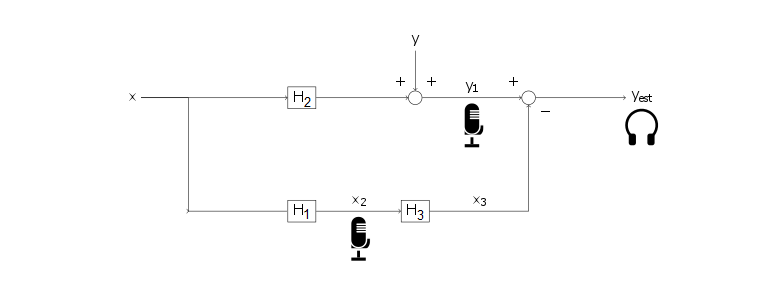



Consignes
=========

En partant du template fourni ci-dessous, complétez la fonction
`(H3,yest) = filtre(n1,d1,n2,d2,y1,x2,fe)`. Pour créer, stocker, et
opérer sur les signaux, on utilisera le package
[NumPy](http://www.numpy.org/) de Python. Pour manipuler les systèmes,
on utilisera le package
[scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html).

Vos fonctions prendront en entrée:

-   `n1`, `d1`, `n2` et `d2` (array-like) correspondent respectivement
    aux coefficients des numérateurs et dénominateurs des fonctions de
    transfert `H1` et `H2` (par ordre décroissant de puissance, comme
    défini dans le help de `TransferFunction` du package signal de
    scipy)
-   `y1` correspond au signal capté par le premier micro ( `y` + moteur
    filtré par `H1`) et `x2` au signal capté par le second micro (moteur
    filtré par `H2`), ce sont des signaux causaux, sous forme
    vectorielle (numpy array)
-   `fe` (\>0) correspond à la fréquence d'échantillonage.

Votre fonction doit fournir en sortie

-   `yest` (= `y`), le signal original enregistré par 20cent sous forme
    vectorielle (numpy array)
-   `H3`, la fonction de transfert permettant d'obtenir `yest` (sous
    forme d'une instance de la classe `StateSpace`, `TransferFunction`
    ou `ZerosPolesGain` )

Ces fonctions pourraient vous être utiles: `ZerosPolesGain`, `to_zpk`, `tf2zpk`,
`to_tf`, `lfilter` (plus rapide que `dlsim` qui est autorisé également).
Notez qu'on ne peut pas multiplier deux fonctions de transfert en
python, il va falloir faire preuve d'ingéniosité! (petit indice, passer
par la représentation "zeros-pôles-gains" peut être utile...)

Vous devrez également adapter les
[docstring](https://realpython.com/documenting-python-code/#documenting-your-python-code-base-using-docstrings)
(commentaire au début de votre fonction, qui s'affiche quand on tape
`help(nomDeLaFonction)`) de chaque fonction, comme indiqué dans le
modèle.

Evaluation
==========

Les critères et modalités d'évaluation sont repris ci-dessous :

-   Respect consignes (1 point) : remise avant la deadline, description
    précise de la fonction et présence de toutes les informations
    importantes en commentaire, tentative d'atteindre l'objectif du
    devoir.
-   Objectif du devoir atteint (5 points) : la fonction soumise remplit
    les objectifs du devoir et passe avec succès des tests simples,
    moyens et avancés (3 points), et les réponses au QCM de test de leur fonction filtre sont correctes (1 point) + QCM sur le principe du feedback (1 point).


Deadline
========

Le vendredi 12 mai à 20h00. Aucune extension n'est possible, prenez vos
dispositions pour soumettre à temps, d'autant plus qu'**il est possible
de faire seulement cinq soumissions par heure**.

Précision
=========

La remise par deux est vivement conseilée pour peu que

-   les deux étudiants soient membres du même groupe de TP ;
-   les deux étudiants soient inscrits dans la même team sur la
    plateforme INGInious.

Questions sur le devoir à adresser à votre tuteur, sur le forum des devoirs ou à
<melanie.ghislain@uclouvain.be>

In [1]:
import numpy as np
import scipy.signal as sg
import pickle

In [2]:
def filtre(n1,d1,n2,d2,y1,x2,fe):
    """
    description:
        En ayant deux entrées (son+bruit parasite et bruit parasite) via les fonctions de transfert de 2 filtre
        qui interviennent sur les deux entrées respectives, on crée et applique un filtre sur l'entrée à 
        traiter, ici y1. On donne en retour la fonction de transfert pour enlever le bruit parasite x2 et
        le signal filtré par cette nouvelle fonction de transfert
    input:
        n1: numpy_array: array du polynome au numérateur   du filtre H1
        d1: numpy_array: array du polynome au dénominateur du filtre H1
        n2: numpy_array: array du polynome au numérateur   du filtre H2
        d2: numpy_array: array du polynome au dénominateur du filtre H2
        y1: numpy_array: array du son que l'on veut avec bruit parasite
        x2: numpy_array: array du bruit parasite
        fe: float      : fréquence d'échantillonage
    output:
        H3  : transfer_function: la nouvelle fonction de transfert qui filtre le signal
        yest: numpy_array      : le signal filtré provenant de y1
        
    """
    
    #On crée nos deux fonctions de transferts connues
    H1 = sg.TransferFunction(n1, d1, dt=1/fe)
    H2 = sg.TransferFunction(n2, d2, dt=1/fe)
    #H3 =H2/H1
    #Transformation en Zeros Poles Gain form
    H1ZPG = sg.ZerosPolesGain(H1, dt=1/fe)
    H2ZPG = sg.ZerosPolesGain(H2, dt=1/fe)
        
    numH3 = np.append(H1ZPG.poles, H2ZPG.zeros)
    denH3 = np.append(H1ZPG.zeros, H2ZPG.poles)
    gainH3 = H2ZPG.gain / H1ZPG.gain
    
    H3ZPG = sg.ZerosPolesGain(numH3, denH3, gainH3, dt=1/fe)
    

    H3 = H3ZPG.to_tf()
    yest = y1 - sg.lfilter(H3.num, H3.den, x2)


    return (H3,yest)



In [3]:
# On vous demande d'utiliser votre fonction filtre sur le fichier 
# sons_dev09.pickle (sur Moodle) pour répondre au QCM sur INGInious 
# Vous pouvez créer les fichiers à écouter à l'aide du code suivant

# Veillez à ce que le fichier sons_dev09.pickle soit dans le même dossier que ce notebook.
# La sortie du signal "a" est enregistrée dans le fichier "out_a.wav"
# Le signal "y1" est également enregistré dans le fichier "in_a.wav" pour que vous puissiez 
# comparer le signal avant et après filtrage ;)

# ATTENTION: si vous êtes sur windows, il est possible que votre ordinateur ne parvienne pas à lire 
# les fichiers out.wav produits. Dans ce cas, convertissez d'abord le fichier en  mp3 pour pouvoir 
# le lire.  De plus, il arrive que les fichiers ne soient pas écrasés lorsqu'on relance le code. 
# Effacez donc les précédents outputs avant de relancer le code. 

from scipy.io.wavfile import write
import pickle
import pandas as pd 
import numpy as np

infile = open('sons_dev09.pickle','rb')
data= pickle.load(infile)
infile.close()
for l in ['a','b','c','d']:
    H3, yest = filtre(data['n1'],data['d1'],data['n2'],data['d2'],data['y'+l],data['x'+l],data['fe']);
    fs = data['fe'][0]
    write("out_"+ l + ".wav", fs, yest*50) # le *50 ici permet juste que le son soit plus fort 
    write("in_"+ l + ".wav", fs, data['y'+l])

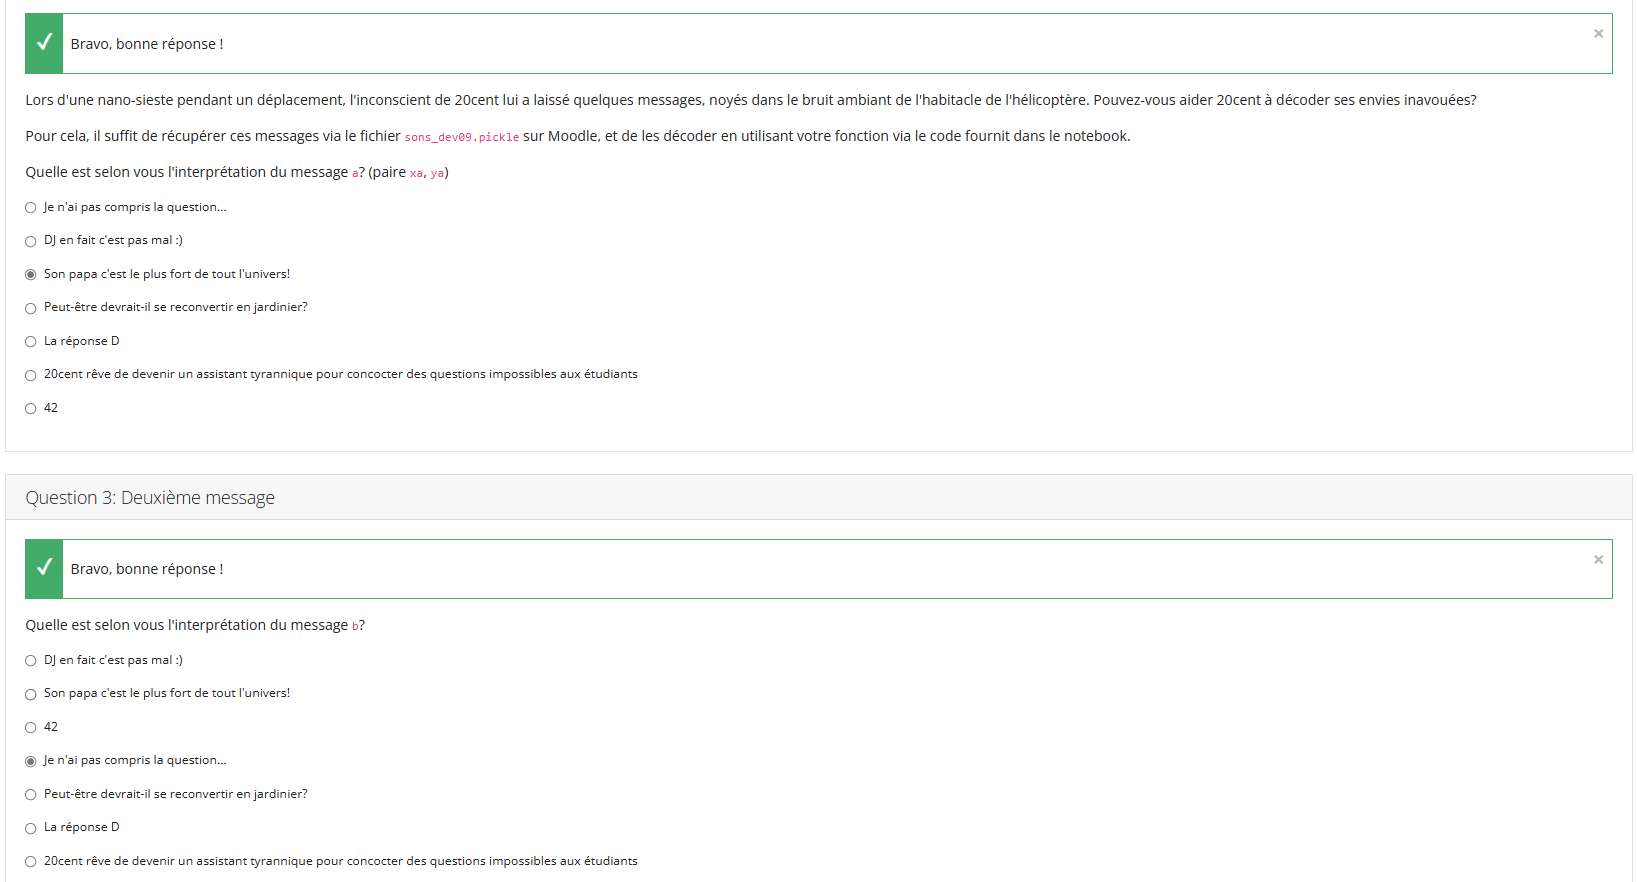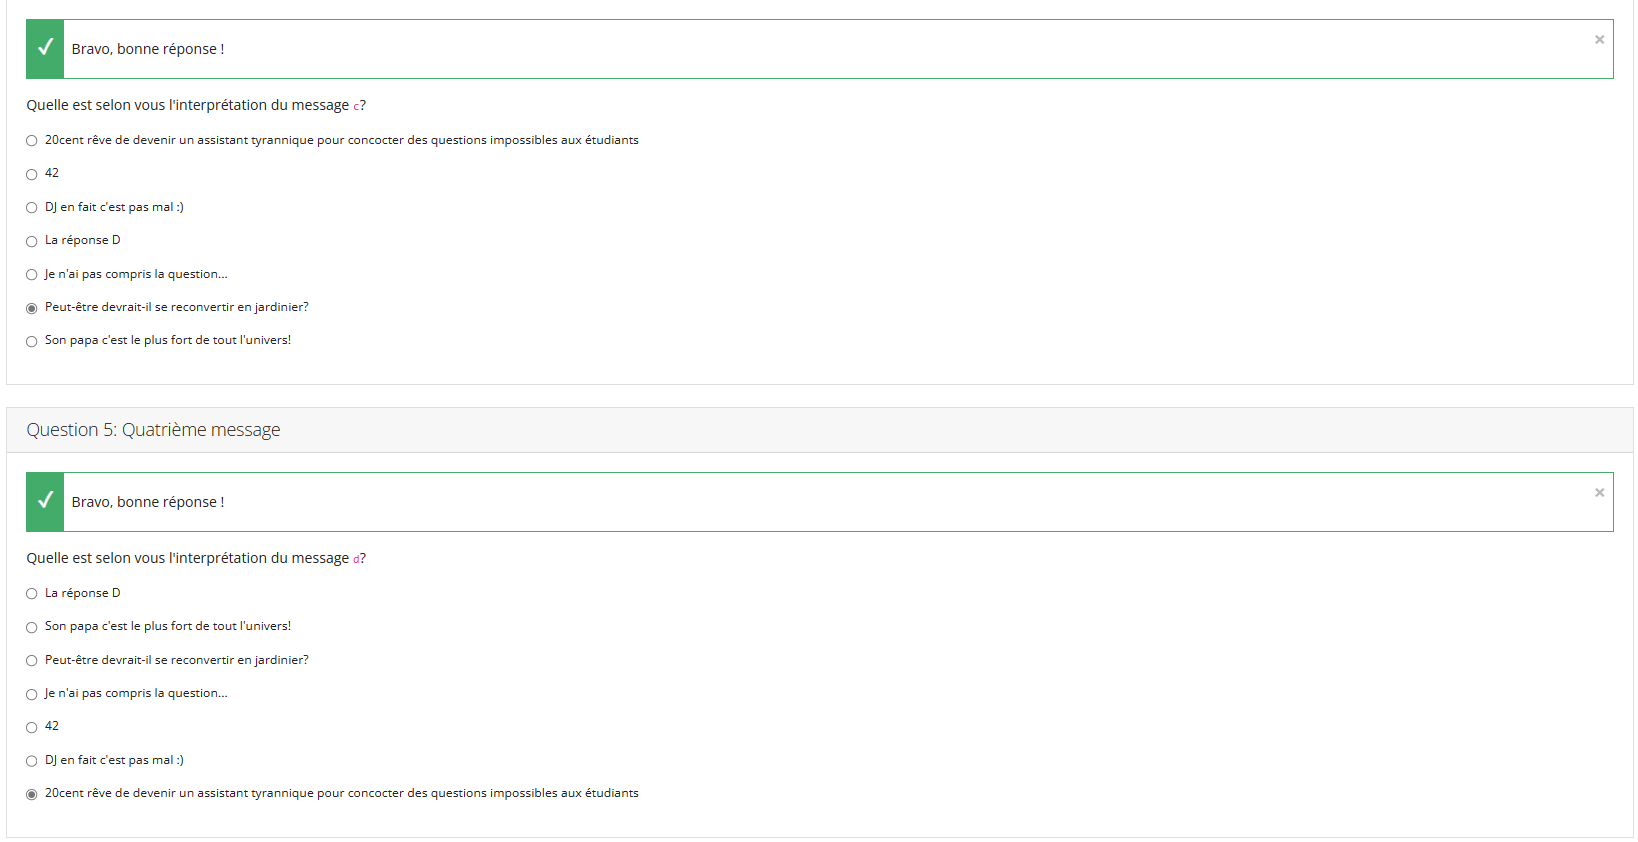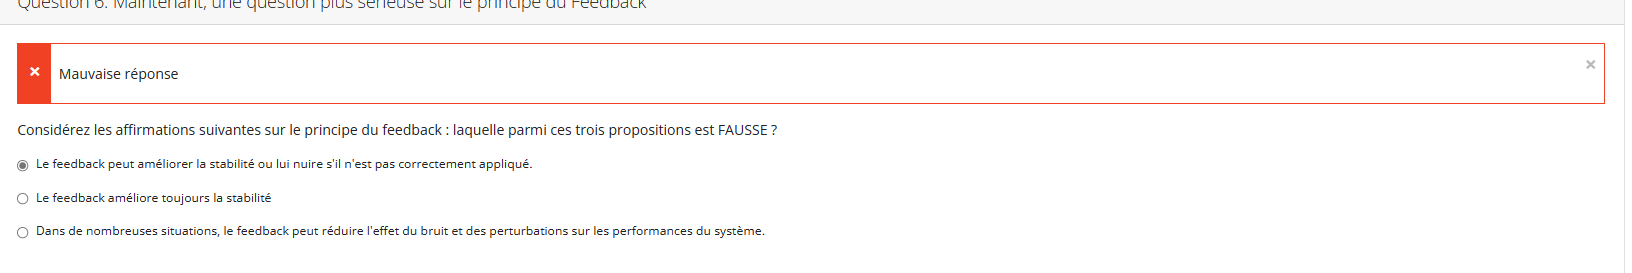